# K-Nearest Neighbors Classifier - the Random Dataset

### Introducing the database

The database for this example is randomly generated. Generating datasets is an important skill to have. This is the best way to explore the algorithms themelves without having to worry about encoding, standardizing, dealing with outliers and all sorts of preprocessing that comes with a real-world dataset. Another advantage of randomly generated datasets is that you have full control over the data. You are free to choose the number of features, the number of classes, the way the points are distributed, everything really! 

I wish you to have lots of fun with the exercise and keep experimenting!

### Importing the necessary libraries

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# The function which will generate the random set of datapoints 
# and will distribute them into a specified number of classes
from sklearn.datasets import make_blobs

# A module for handling data
import pandas as pd

# Python's plotting module. 
# We improve the graphics by overriding the default matplotlib styles with those of seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# A method used to split the dataset into training and testing
from sklearn.model_selection import train_test_split

# The K-nearest neighbors classifier from the sklearn library
from sklearn.neighbors import KNeighborsClassifier

# Metrics that would allow us to evaluate our model
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

# A class that would help us find the best model from a specified set of models.
from sklearn.model_selection import GridSearchCV

# A function that would plot for us the decision regions of a problem
from mlxtend.plotting import plot_decision_regions

# This library will be used to measure the difference in times between the start and the end of a process
import time

# The Python package for scientific computing
import numpy as np

### Generating the database

In [3]:
# Generate normally distributed datapoints belonging to three separate clusters.
# Let the total number of points be 1000.
# Let us choose a center for each of the three classes.
# The 'random state' parameter ensures that each run would produce the same distribution of points
inputs, target = make_blobs(n_samples = 1000, 
                            centers = [(-3, 3), (0, 0), (2, 2)], 
                            random_state = 365)

In [4]:
# Return the shapes of the inputs and the targets.
# We see that 'inputs' consists of 1000 rows and 2 columns while
# 'targets' stores 1000 items.
inputs.shape, target.shape

((1000, 2), (1000,))

In [5]:
# Using the 'inputs' and 'target' variables from above, let's create a dataframe.
# The 'inputs' variable stores the two 'features' which represent the x- and y-coordinates of each datapoint.
# The 'target' variable stores the classes.
data = pd.DataFrame(data = inputs, columns = ['Feature 1', 'Feature 2'])
data['Target'] = target
data

,Feature 1,Feature 2,Target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0
...,...,...,...
995,-4.412271,2.420197,0
996,0.398022,-0.847863,1
997,-0.588974,0.317711,1
998,-2.328593,4.957489,0


### Plotting the database

In [6]:
# Create a color palette
knn_palette = sns.color_palette(['#000C1F', '#29757A', '#FF5050'])
knn_palette

[(0.0, 0.047058823529411764, 0.12156862745098039),
 (0.1607843137254902, 0.4588235294117647, 0.47843137254901963),
 (1.0, 0.3137254901960784, 0.3137254901960784)]

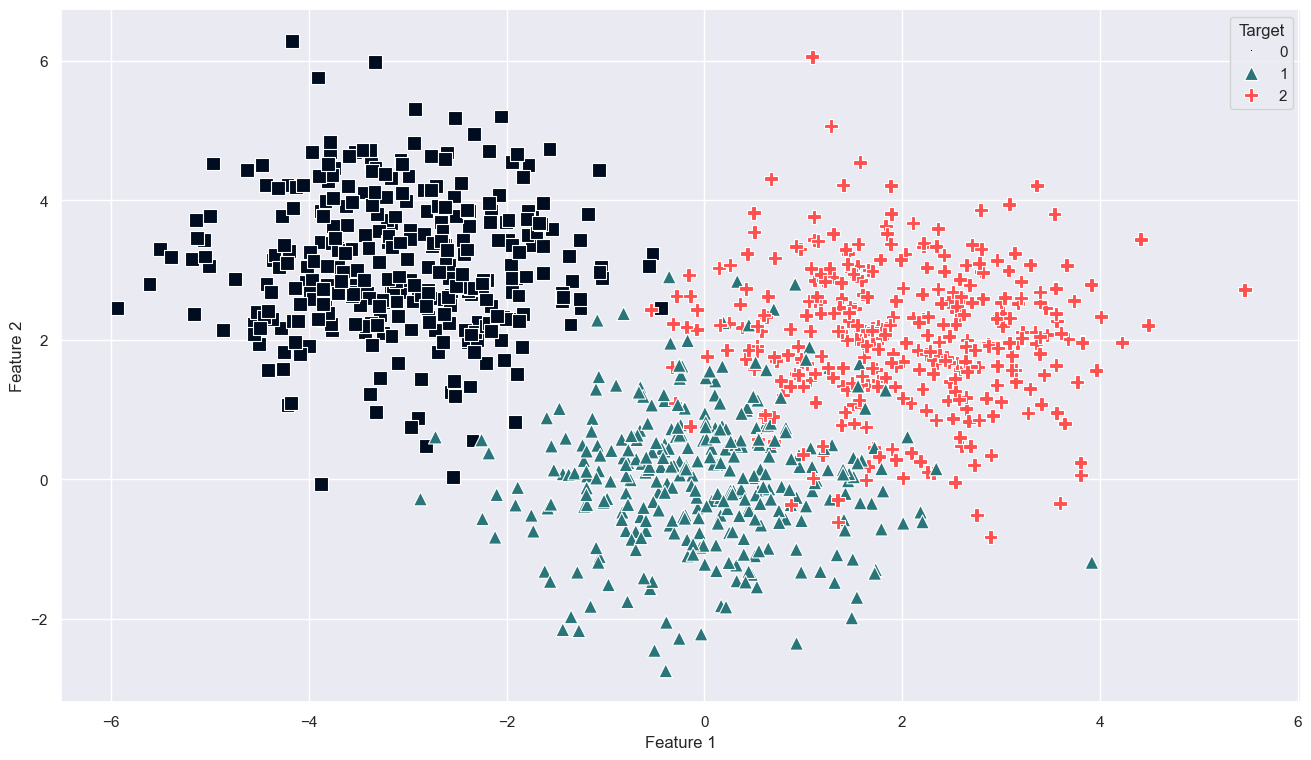

In [7]:
# Apply the seaborn style
sns.set()

# Set the size of the figure
plt.figure(figsize = (16, 9))

# Create a scatter plot.
# On the x-axis, we have the first feature.
# The y-axis we have placed the second feature.
# The 'data' parameter specifies the dataset we are drawing the columns from.
# The 'hue' parameter specifies the feature based on which the points are going to be colored.
# The 'palette' parameter specifies the colors to be used in the plot.
# The 'markers' parameter determines the shape of the points.
# The 'style' parameter connects markers to classes.
# The 's' parameter specifies the size of the points.
# The 'alpha' parameter controls the opacity of the datapoints.
# We have decided to set the 'legend' parameter equal to False as we will make no use of it in this example.
sns.scatterplot(x = 'Feature 1', y = 'Feature 2', 
                data = data, 
                hue = 'Target', 
                palette = knn_palette,
                markers = [',', '^', 'P'],
                style = 'Target', 
                s = 100);

### Visualizing the distribution of the points

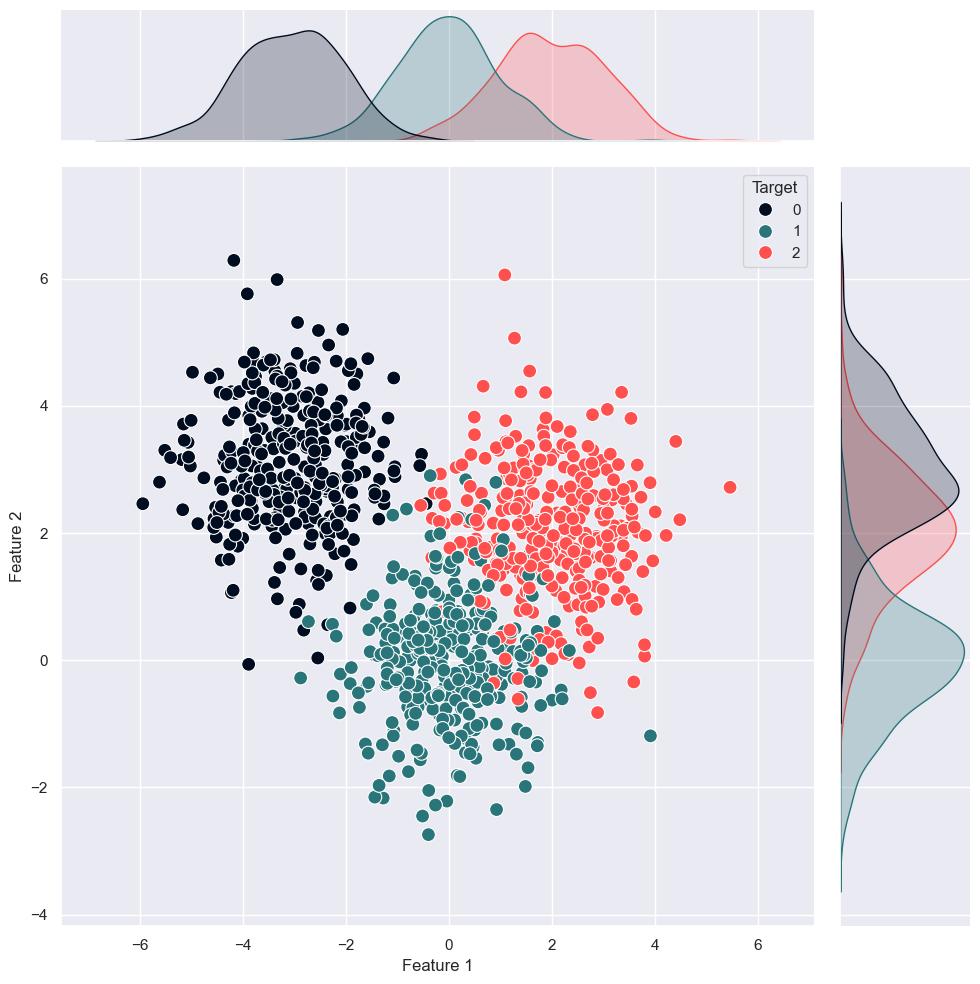

In [8]:
# Apply the seaborn style
sns.set()

# Create a seaborn jointplot.
sns.jointplot(x = 'Feature 1', y = 'Feature 2', 
              data = data, 
              hue = 'Target', 
              palette = knn_palette,
              height = 10,
              s = 100, 
              legend = True);

### Creating a train-test-split

In [9]:
# Create a training and a test dataset.
# Choose the test size such that 20% of the data goes to testing.
# Since 'train_test_split()' distributes the points randomly, we set a seed equal to 365
# so that the final results are identical each time we run the split.
# The 'stratify' argument allows for splitting the data in such a way that
# the training and the testing datasets contain an equal portion of samples
# from both classes.
x_train, x_test, y_train, y_test = train_test_split(inputs, target, 
                                                    test_size=0.2, 
                                                    random_state=365, 
                                                    stratify = target)

### Creating the model

In [10]:
# Create a classifier and set a specific number of neighbours
clf = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform')

# Fit the data
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

### Predicting a sample

In [11]:
# Define the coordinates of a point whose class we want to identify.
feature_1 = -0.18
feature_2 = 3.2

In [12]:
# Predict the class of a sample given these two features.
clf.predict([[feature_1, feature_2]])

array([0])

In [13]:
# Get the distance to the neighbour and its index in the array
neighbors = clf.kneighbors([[feature_1, feature_2]])
neighbors

(array([[0.27086818, 0.34749744]]), array([[336, 215]], dtype=int64))

### Visualizing the neighbors

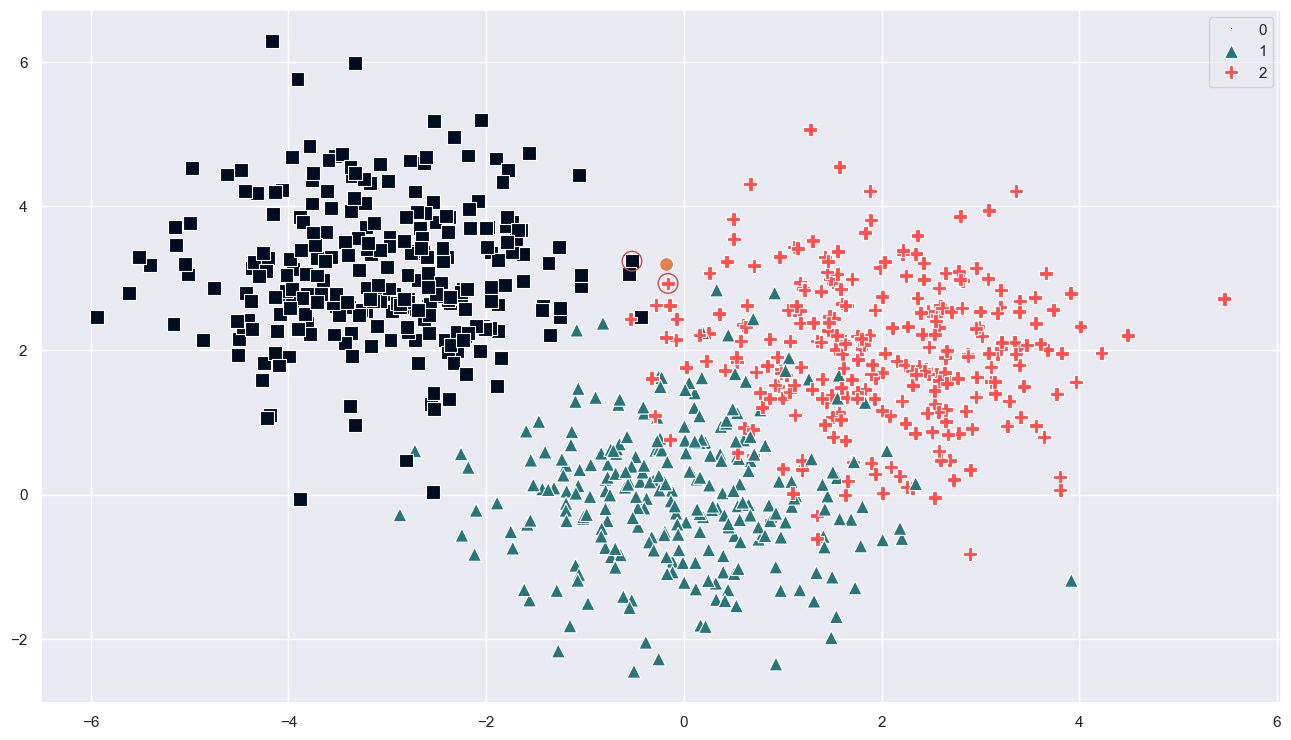

In [14]:
# Apply the seaborn style
sns.set()

plt.figure(figsize = (16, 9))

# Plot the datapoints from the training data
sns.scatterplot(x = x_train[:, 0], y = x_train[:, 1],
                hue = y_train, 
                palette = knn_palette,
                markers = [',', '^', 'P'],
                style = y_train, 
                s = 100, 
                legend = True);

# Plot the point to be predicted
sns.scatterplot(x = [feature_1], y = [feature_2], 
                style = [feature_2],
                markers = ['o'],
                s = 100,
                legend = False);

# A list to store the x-values of all neighbors
plot_x_train = []
# A list to store the y-values of all neighbors
plot_y_train = []

# Append all x- and y-values to the respective lists
for i in neighbors[1]:
    plot_x_train.append(x_train[i, 0])
    plot_y_train.append(x_train[i, 1])

# Enclose all nearest neighbors
plt.scatter(plot_x_train, 
            plot_y_train, 
            s=200, facecolors='none', edgecolors='r');

### Getting the parameters of the model

In [15]:
# Get the parameters of the classifier
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

### Drawing the decision regions

In [16]:
# Return the shape of the x_train array
x_train.shape

(800, 2)

Time elapsed: 95.2 seconds


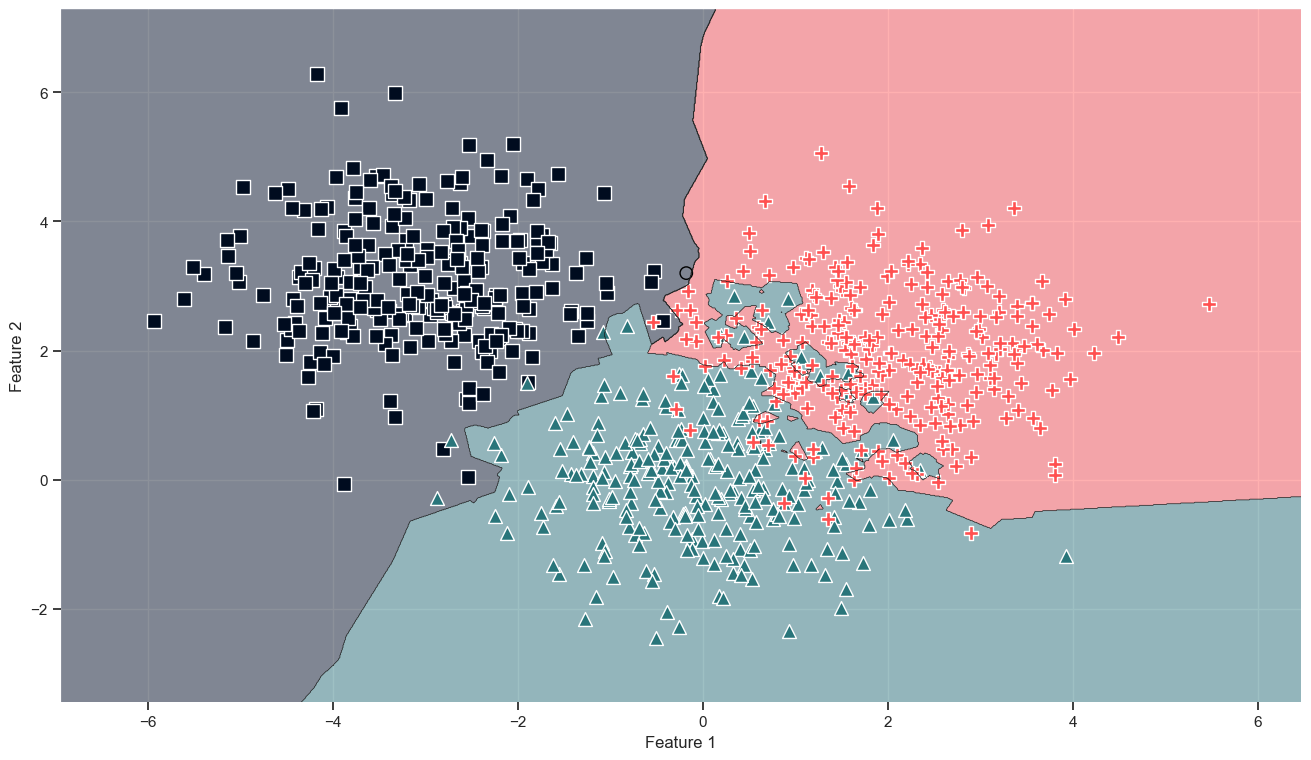

In [17]:
# Store the time at which the operation has begun
start = time.time()

plt.figure(figsize = (16, 9))

# Plot the decision regions.
# The 'X' and 'y' parameters are the x- and y-coordinates of the training data.
# 'X_highlight' represents a datapoint which we want to highlight - in this case,
# the sample whose class we want to predict.
# Choose the classifier with the 'clf' parameter
# With 'markers' and 'colors' we choose the shape and color of each datapoint.
# With 'scatter_kwargs' we list additional parameters in the form of a dictionary.
# In our case, these are size of the datapoints, the color of their edges, as well as
# the transparacy.
# legend = 0 hides the legend.
plot_decision_regions(X = x_train, y = y_train,
                      X_highlight = np.array([[feature_1, feature_2]]),
                      clf = clf,
                      markers = [',', '^', 'P'],
                      colors = '#000c1f,#29757a,#ff5050',
                      scatter_kwargs = {'s':100, 'edgecolor':'white', 'alpha':1},
                      legend = 0)

# Give labels to the axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

# Store the time at which the operation has ended
end = time.time()

# Print the difference between the two times
print(f'Time elapsed: {round(end - start, 1)} seconds')

In [18]:
np.array([[feature_1, feature_2]]).shape

(1, 2)

### Getting the error rates of a set of models

In [19]:
# Create empty lists which will store the error rates for models with
# uniform or distance weights.
error_uniform = []
error_distance = []

# The range of K-values we will cover
k_range = range(1, 51)

# For each K value, create a classifier with both type of weights.
# In both cases, fit the model to the trining data.
# Make predictions on the test data.
# Append the error rate as 1-accuracy.
for k in k_range:
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'uniform')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_uniform.append(1 - accuracy_score(y_test, predictions))
    
    clf = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    error_distance.append(1 - accuracy_score(y_test, predictions))

### Plotting the error rates as a function of the number of neighbors

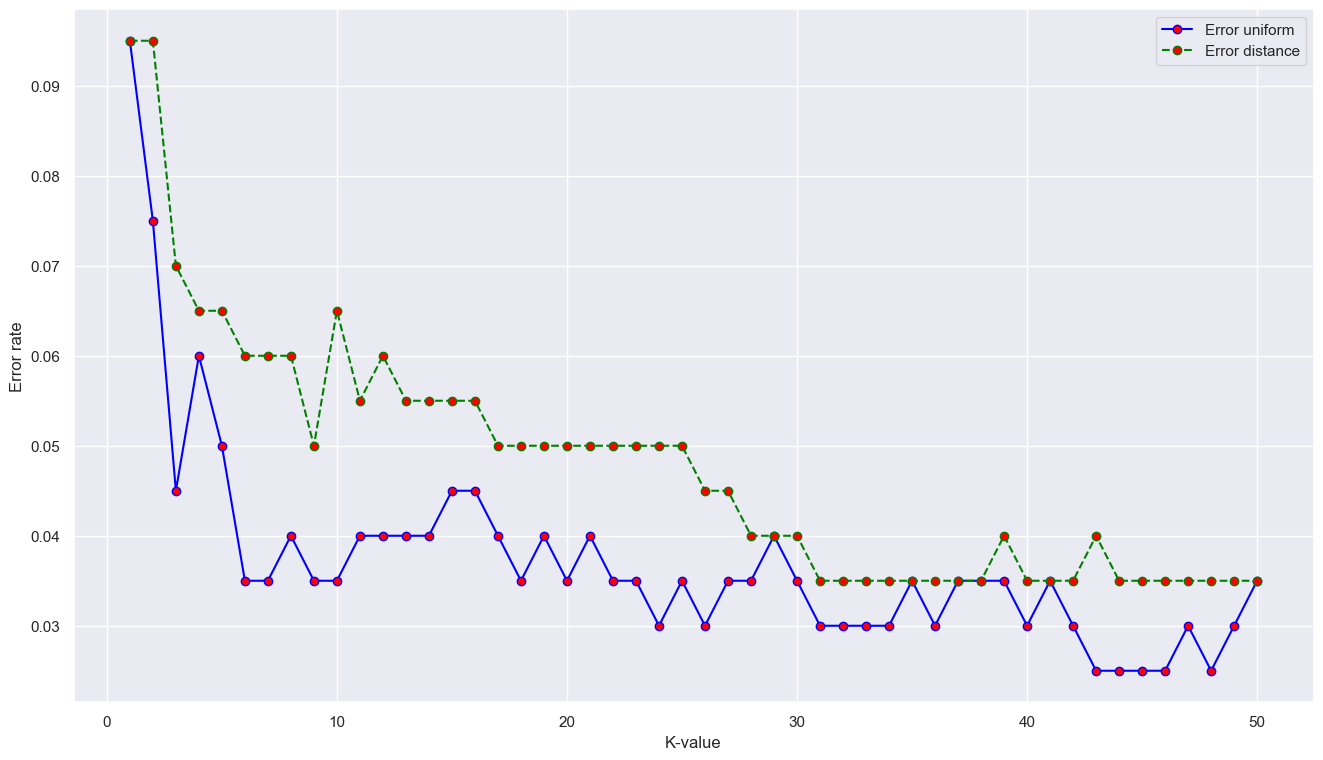

In [20]:
plt.figure(figsize = (16, 9))

# Plot the error rates.
# The models with uniform weights are plotted with a solid blue line.
# The models with distance weights are plotted with a dashed green line.
# The circular markers mark the distinct K-values.
plt.plot(k_range, error_uniform, c = 'blue', linestyle = 'solid', 
         marker = 'o', markerfacecolor = 'red',  label = 'Error uniform');
plt.plot(k_range, error_distance, c = 'green', linestyle = 'dashed', 
         marker = 'o', markerfacecolor = 'red', label = 'Error distance');

plt.legend()

plt.xlabel('K-value')
plt.ylabel('Error rate');

### Choosing a set of parameters to test

In [21]:
# Choose a set of parameters to test in the form of a dictionary.
parameters = {'n_neighbors':range(1, 51), 
              'weights':['uniform', 'distance']}

### Create an instance of the GridSearchCV class

In [22]:
# Create an instance of the GridSearchCV class.
# We choose KNeighborsClassifier as an estimator.
# Choose the dictionary of parameters we want to cover.
# Choose a scoring metric. I have decided to go with accuracy.
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), 
                           param_grid = parameters, 
                           scoring = 'accuracy')

In [23]:
# Fit all models to the training data and choose the best one based on the highes accuracy.
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [24]:
# Return the parameters of the best model
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [25]:
# Make 'clf' an instance of the best model.
clf = grid_search.best_estimator_

In [26]:
clf

KNeighborsClassifier(n_neighbors=10)

In [27]:
# Display the score obtained by the best model.
grid_search.best_score_

0.9512499999999999

### Make predictions on the test dataset

In [28]:
# Predict the classes of the samples in the test dataset using the best model.
y_test_pred = clf.predict(x_test)
y_test_pred.shape

(200,)

### Construct the confusion matrix

In [29]:
# Removing the seaborn visualization removes the white lines that come with it.
sns.reset_orig()

# Create a confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred,
    labels = clf.classes_,
    cmap = 'magma'
);

### Print out the classification report

In [30]:
# Print the classifcation report
print(classification_report(y_test, y_test_pred, target_names = ['0', '1', '2']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.97      0.93      0.95        67
           2       0.93      0.98      0.96        66

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

